Giá nhà cho 80m^2 là :  [1207.3658109]


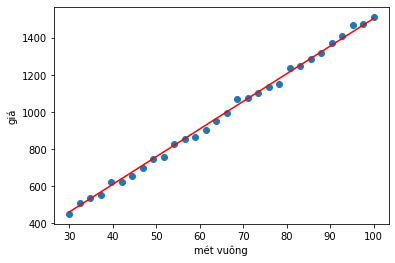

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# input data
data_path = "drive/My Drive/Colab/Linear regression/data_linear.csv"
data=pd.read_csv(data_path)

# số lượng dữ liệu input vào 
N = data.shape[0]

# [ : , 0 ] means (more or less) [ first_row:last_row , column_0 ].
# If you have a 2-dimensional list/matrix/array, this notation will 
# give you all the values in column 0 (from all rows)
x = data.iloc[:, 0]

# normalize
# x = StandardScaler().fit_transform(x.values.reshape(-1, 1))
# https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

# x.reshape(-1,1): biến ma trận x thành n hàng ma trận size N x 1 tương 
# tự với x.reshape(N,1). N là số dữ liệu trong dataset
x = x.values.reshape(-1, 1)

y = data.iloc[:, 1]
# y = StandardScaler().fit_transform(y.values.reshape(-1, 1))
y = y.values.reshape(-1, 1)


# vẽ hết tất cả các cặp điểm (x,y) lên đồ thị
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

# np.ones((a,b)): tạo một ma trận 1 có size a x b
# np.ones(5): tạo ma trân 1 có size 1 x 5   


x = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,1.]).reshape(-1,1)
numOfIteration = 150

cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
  
    # w[0] -= learning_rate*np.sum(r)
    # # correct the shape dimension
    # w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))
    # #print(cost[i])
    w -= learning_rate*np.sum(np.matmul(np.transpose(x),r))
   
predict = np.dot(x, w)

plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
# plt.show()


x1 = 80
y1 = w[0] + w[1] * x1
print('Giá nhà cho 80m^2 là : ', y1)